# Shocktube Test

In [1]:
import os, sys
sys.path += ['..']
import plot_tools as pt
import numpy as np
import matplotlib.pyplot as plt

# more setup
#%matplotlib widget
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Interpolate and Diff

### Exact Solution

In [2]:
exact = pt.ds.load_data("../../../data/shocktube/exact_solutions/Balsara1/solution_last.dat")
# interp func of exact solution
rho_exact = pt.interp1d_data(exact, cols=[1,2], kind='zero')
bvecy_exact = pt.interp1d_data(exact, cols=[1,7], kind='zero')

loading ../../../data/shocktube/exact_solutions/Balsara1/solution_last.dat cols: all


#### Compare different kind of interpolation

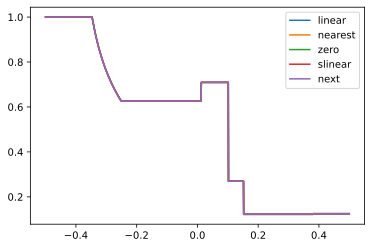

In [3]:
#%matplotlib inline
pt.plt_exact(exact, cols=[1,2], kind=['linear','nearest','zero','slinear','next'], num=1600, marker='-')

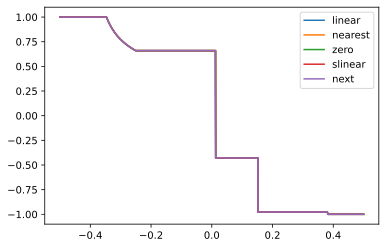

In [4]:
#%matplotlib inline
pt.plt_exact(exact, cols=[1,7], kind=['linear','nearest','zero','slinear','next'], num=1600, marker='-')

### Numerical Solution

In [5]:
dirs = [
    "n200",
    "n400",
    "n800",
    "n1600"
]
for i in range(len(dirs)):
    dirs[i] = "../../../data/shocktube/Balsara1/" + dirs[i]

rho = pt.DataSet(dirs, r"hydrobase-rho*", cols=[8,11])
bvecy = pt.DataSet(dirs, r"hydrobase-bvec*", cols=[8,12])

loading ../../../data/shocktube/Balsara1/n200/hydrobase-rho.it000320.x.tsv cols: [8, 11]
loading ../../../data/shocktube/Balsara1/n400/hydrobase-rho.it000640.x.tsv cols: [8, 11]
loading ../../../data/shocktube/Balsara1/n800/hydrobase-rho.it001280.x.tsv cols: [8, 11]
loading ../../../data/shocktube/Balsara1/n1600/hydrobase-rho.it002560.x.tsv cols: [8, 11]
loading ../../../data/shocktube/Balsara1/n200/hydrobase-bvec.it000320.x.tsv cols: [8, 12]
loading ../../../data/shocktube/Balsara1/n400/hydrobase-bvec.it000640.x.tsv cols: [8, 12]
loading ../../../data/shocktube/Balsara1/n800/hydrobase-bvec.it001280.x.tsv cols: [8, 12]
loading ../../../data/shocktube/Balsara1/n1600/hydrobase-bvec.it002560.x.tsv cols: [8, 12]


In [6]:
# calc all: diff, integrate, convergence order
rho.calcAll(rho_exact, norm=2)
bvecy.calcAll(bvecy_exact, norm=2)

### Convergence Order

In [7]:
rho.getConvorderSet()

[0.6006920075162178, 0.7451737772149722, 0.8262643335878184]

In [8]:
bvecy.getConvorderSet()

[0.6218880415200783, 0.6641854894838848, 0.6817780491461991]

## Plot

### $\rho$

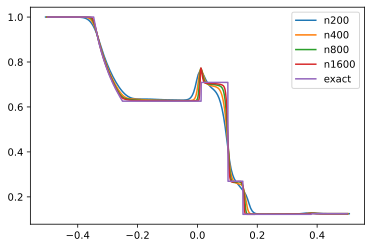

In [11]:
rho.pltData(f_ref=rho_exact, num=1600)

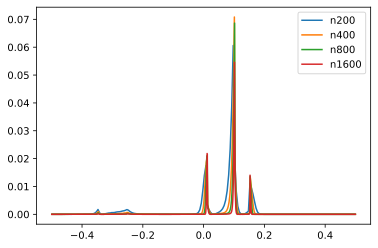

In [12]:
rho.pltDiff()

###### Assume 1st order convergent

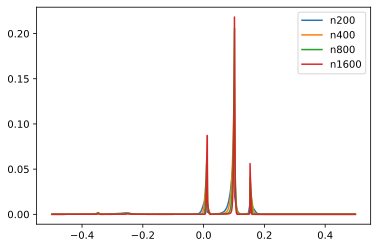

In [13]:
convOrder=1
rho.pltDiff(fy=lambda y,i: y*(i+1)**(convOrder))

### $B_y$

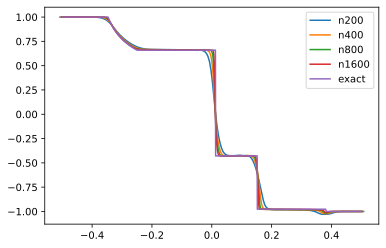

In [14]:
bvecy.pltData(f_ref=bvecy_exact,num=1600)

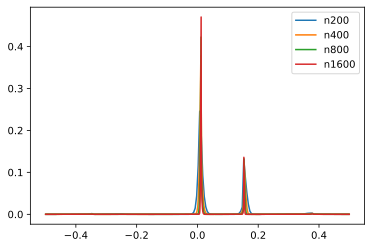

In [15]:
bvecy.pltDiff()

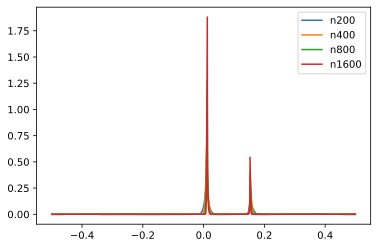

In [16]:
convOrder=1
bvecy.pltDiff(fy=lambda y,i: y*(i+1)**(convOrder))